# __Gender Discrimination Detection__ TASK-4 

objective : detect gender based discrimination in a given text / message.

Action Plan :  since scraping the data from API/ internet is tedoius and has to be manually labelled i am planning to create a dataset using pandas and sample biased and unbiased statements to create a balanced dataset ,first i will create my own balanced dataset in dataframe and preprocess the dataset do some basic EDA  and then use NLP techniques to perform feature engineering and then deploy multiple ML models to compare performance and then finally store the results in a mongodb database collections 

## _Importing All Necessary Libraries_ 

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import random
import re
import nltk
from nltk.corpus import stopwords
from torch.utils.data import DataLoader, TensorDataset
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
import json
from pymongo import MongoClient

## _I am creating  my own balanced data set for Gender biased opinion or Discrimination using text module_

In [19]:
biased_sentences = [
    "Women should stick to cooking and cleaning.",
    "Men are naturally better at science.",
    "She got the promotion because she is a woman.",
    "Girls are too emotional to lead.",
    "He can't be a nurse, that's a woman's job.",
    "Women are not fit for leadership roles.",
    "Men are better drivers than women.",
    "She can't handle this job, it's too tough for her.",
    "Girls are not good at math.",
    "Men are more logical than women.",
    "Men should handle all the finances.",
    "Women are too sensitive for tough negotiations.",
    "Men are better at engineering.",
    "Women can't be good programmers.",
    "Men should be in charge of the household.",
    "Women should focus on raising children.",
    "Men don't belong in the kitchen.",
    "Women are too emotional for politics.",
    "Men are natural leaders.",
    "Women should dress modestly.",
    "Men are more suited for physical labor.",
    "Women are better at nurturing.",
    "Men should not show vulnerability.",
    "Women should not pursue STEM careers.",
    "Men are better at problem-solving.",
    "Women are not strong enough for sports.",
    "Men are more rational than women.",
    "Women should not travel alone.",
    "Men are more ambitious than women.",
    "Women should not work after marriage.",
    "Men are better at decision-making.",
    "Women should be homemakers.",
    "Men should not be involved in fashion.",
    "Women are too soft for the military.",
    "Men should always be the breadwinner.",
    "Women can't handle high-stress jobs.",
    "Men are better at driving.",
    "Women should not speak up in meetings.",
    "Men should always take the lead.",
    "Women are better at caregiving.",
    "Men should not wear makeup.",
    "Women should not lift heavy weights.",
    "Men are better at technology.",
    "Women are too fragile for construction work.",
    "Men should not show emotions at work.",
    "Women should stay at home with the kids.",
    "Men are more logical than women.",
    "Women can't be good at math.",
    "Men should dominate in sports.",
    "Women are too delicate for outdoor activities.",
    "Men are better at handling pressure.",
    "Women should focus on arts and crafts.",
    "Men should not be nurses.",
    "Women should not work in finance.",
    "Men should not do household chores.",
    "Women are better at organizing events.",
    "Men are more suited for leadership.",
    "Women should not pursue careers in law enforcement.",
    "Men are better at competitive fields.",
    "Women are too gentle to be CEOs.",
    "Men should always protect women.",
    "Women should not play contact sports.",
    "Men are more competitive than women.",
    "Women are not suited for scientific research.",
    "Men should not work as flight attendants.",
    "Women should be teachers.",
    "Men should not work in childcare.",
    "Women are not as tech-savvy as men.",
    "Men should not take paternity leave.",
    "Women are better at handling emotions.",
    "Men should always initiate dating.",
    "Women should not work in the military.",
    "Men should not cry.",
    "Women should focus on their looks.",
    "Men are better at construction.",
    "Women should not be involved in politics.",
    "Men are more analytical than women.",
    "Women are too emotional for high-stress jobs.",
    "Men should always be strong.",
    "Women should not drive long distances.",
    "Men are more assertive than women.",
    "Women should not be firefighters.",
    "Men should not work as secretaries.",
    "Women are better at social work.",
    "Men should be mechanics.",
    "Women should not work late hours.",
    "Men are better at science.",
    "Women should focus on family instead of career.",
    "Men should not work in beauty salons.",
    "Women should not play video games.",
    "Men should not show weakness.",
    "Women should not wear pants.",
    "Men are better at sports.",
    "Women should not have short hair.",
    "Men should not care about fashion.",
    "Women are better at cooking.",
    "Men should not be stay-at-home dads.",
    "Women should only do office work.",
    "Men should not be dancers.",
    "Women should not run marathons.",
    "Men are better at academics.",
    "Women should not play chess.",
    "Men are better at math.",
    "Women should not be scientists.",
    "Men should not do yoga.",
    "Women should only work part-time.",
    "Men are better in the stock market.",
    "Women should not drive heavy vehicles.",
    "Men should not be primary caregivers.",
    "Women are better at languages.",
    "Men should not work in health care.",
    "Women should not do martial arts.",
    "Men are better at managing companies.",
    "Women should avoid technical fields.",
    "Men should not be involved in childcare.",
    "Women should not be pilots.",
    "Men are better at public speaking.",
    "Women should not be engineers.",
    "Men should always be competitive.",
    "Women should not be in the navy.",
    "Men should not take care of children.",
    "Women should avoid heavy lifting.",
    "Men are better at investing.",
    "Women should not join the police force.",
    "Men should not work in education.",
    "Women should be secretaries.",
    "Men should not be hairdressers.",
    "Women should not play sports.",
    "Men should not be nurses.",
    "Women should not do programming.",
    "Men should be leaders.",
    "Women should not be in combat roles.",
    "Men should not be involved in fashion.",
    "Women should be administrative assistants.",
    "Men should not cook.",
    "Women should not run businesses.",
    "Men should not do cleaning.",
    "Women should stay out of politics.",
    "Men should not sew.",
    "Women should not be construction workers.",
    "Men should not be babysitters.",
    "Women should avoid STEM fields.",
    "Men should always be dominant.",
    "Women should not do scientific research.",
    "Men should not work in social services.",
    "Women should avoid technical jobs.",
    "Men should be assertive.",
    "Women should not do outdoor work.",
    "Men should not be librarians.",
    "Women should avoid competitive fields.",
    "Men should not do clerical work.",
    "Women should not work in IT.",
    "Men should be the main providers.",
    "Women should not be surgeons.",
    "Men should not take care of babies.",
    "Women should avoid leadership roles."
]

unbiased_sentences = [
    "Everyone deserves equal opportunities.",
    "Leadership is about skills, not gender.",
    "She got the promotion because of her hard work.",
    "Emotions can be a strength in leadership.",
    "Anyone can be a nurse regardless of gender.",
    "Leadership roles should be based on merit.",
    "Driving skills depend on the individual, not gender.",
    "This job requires determination, which she has.",
    "Math skills are not determined by gender.",
    "Logical thinking is a trait anyone can have.",
    "Finances should be handled by the person most skilled at it.",
    "Negotiation skills are developed through practice and are not gender-specific.",
    "Engineering is a field anyone can excel in with the right education and skills.",
    "Programming skills are not determined by gender.",
    "Household management should be a shared responsibility.",
    "Raising children is a shared responsibility.",
    "Cooking is a skill anyone can learn and enjoy.",
    "Political skills depend on the individual, not gender.",
    "Leadership depends on the individual’s capabilities.",
    "People should dress in a way that makes them comfortable.",
    "Physical labor suitability depends on individual strength, not gender.",
    "Nurturing is a human trait, not a gender-specific one.",
    "Showing vulnerability is a sign of strength for everyone.",
    "STEM careers are for anyone with an interest and aptitude.",
    "Problem-solving skills are developed through experience and learning.",
    "Sports ability is determined by training and dedication.",
    "Rational thinking is a human trait, not a gender-specific one.",
    "Travel safety precautions should be observed by everyone.",
    "Ambition is a personal trait and not gender-specific.",
    "Work decisions should be based on individual circumstances and preferences.",
    "Decision-making should be based on knowledge and experience, not gender.",
    "Home responsibilities should be shared equally.",
    "Fashion is an interest that anyone can have.",
    "The military can be a career for anyone with the aptitude and desire.",
    "Breadwinning should be a shared responsibility.",
    "Handling stress depends on individual coping mechanisms, not gender.",
    "Driving ability is an individual skill.",
    "Everyone’s voice should be heard in meetings.",
    "Leadership can come from anyone, regardless of gender.",
    "Caregiving is a human trait and can be done by anyone.",
    "Makeup is a personal choice for anyone.",
    "Lifting weights is about strength, not gender.",
    "Technology skills can be learned by anyone.",
    "Construction work suitability depends on training and physical ability.",
    "Emotions are a natural part of being human.",
    "Childcare is a shared responsibility.",
    "Logical thinking is not gender-specific.",
    "Math skills are developed through practice and study.",
    "Sports are for anyone who enjoys them.",
    "Outdoor activities are for everyone to enjoy.",
    "Handling pressure depends on individual resilience.",
    "Arts and crafts can be enjoyed by anyone.",
    "Nursing is a profession for anyone with the skills and desire.",
    "Finance is a field open to anyone with the interest and ability.",
    "Household chores should be shared equally.",
    "Event organization is a skill anyone can have.",
    "Leadership is about capability and not gender.",
    "Law enforcement is a career for anyone who qualifies.",
    "Competitiveness is a personal trait.",
    "CEOs can be anyone with the skills and ambition.",
    "Protection is a mutual responsibility.",
    "Contact sports are for anyone interested and capable.",
    "Competitiveness varies from person to person.",
    "Scientific research is a field for anyone with curiosity and dedication.",
    "Flight attendants can be of any gender.",
    "Teaching is a profession for anyone with the passion to educate.",
    "Childcare is a profession for anyone with the skills and dedication.",
    "Tech-savviness depends on interest and practice, not gender.",
    "Paternity leave is important for all new parents.",
    "Handling emotions is a personal skill.",
    "Initiating dating is a mutual responsibility.",
    "Military service is a career for anyone who qualifies.",
    "Crying is a natural expression of emotion.",
    "Focus should be on skills and character.",
    "Construction skills are learned, not inherent to a gender.",
    "Politics is a field for anyone with the interest and ability.",
    "Analytical skills are developed through study and practice.",
    "High-stress jobs require resilience, not a specific gender.",
    "Strength is a personal trait and not gender-specific.",
    "Driving skills should be based on ability, not gender.",
    "Assertiveness is a personal trait.",
    "Firefighting is a profession for anyone with the training and ability.",
    "Secretarial work is a job for anyone with the skills.",
    "Social work is a field for anyone with compassion and dedication.",
    "Mechanics is a profession for anyone with the training.",
    "Work hours should be flexible for everyone.",
    "Scientific aptitude is not gender-specific.",
    "Career focus is a personal choice.",
    "Beauty salon work is a job for anyone with the interest and skills.",
    "Video games are for everyone to enjoy.",
    "Showing weakness is human.",
    "Clothing choices are personal.",
    "Sports are for anyone who enjoys them.",
    "Hair length is a personal choice.",
    "Fashion interest is personal.",
    "Cooking is a skill anyone can develop.",
    "Parenting is a role for anyone with the love and dedication.",
    "Art and design are fields open to all.",
    "Customer service is a job for anyone with patience and empathy.",
    "Fitness training is for anyone interested.",
    "Running a business depends on skill, not gender.",
    "Pet care is a responsibility for anyone with love for animals.",
    "Culinary arts are open to anyone with passion.",
    "Accountancy is a profession for anyone with aptitude.",
    "Communication skills can be developed by anyone.",
    "Playing musical instruments is for anyone with interest.",
    "Public relations is a field for anyone with people skills.",
    "Hiking and adventure sports are for everyone.",
    "Botany and gardening are for anyone with a green thumb.",
    "Cultural studies can be pursued by anyone.",
    "Journalism is a field for anyone with a knack for storytelling.",
    "Mental health professions are for anyone with empathy and training.",
    "Animation and graphic design are fields for anyone with creativity.",
    "Everyone can learn to code.",
    "Leadership can be taught to anyone.",
    "Public speaking skills can be developed by anyone.",
    "Organizational skills are useful for everyone.",
    "Critical thinking is a valuable skill for all.",
    "Time management is important for everyone.",
    "Creative thinking can be nurtured in anyone.",
    "Empathy is a quality everyone can develop.",
    "Writing skills are important for all.",
    "Customer service can be done by anyone with the right training.",
    "Project management skills are beneficial for everyone.",
    "Conflict resolution is a skill anyone can learn.",
    "Anyone can excel in sports with practice.",
    "Meditation is beneficial for everyone.",
    "Gardening is a rewarding hobby for anyone.",
    "Everyone can enjoy and appreciate art.",
    "Public health is a concern for all.",
    "History is a subject for everyone.",
    "Physics can be understood by anyone with effort.",
    "Everyone can contribute to environmental conservation.",
    "Music is a universal language for all.",
    "Travel broadens everyone's horizons.",
    "Mathematics is a fundamental skill for everyone.",
    "Literature enriches the lives of all.",
    "Astronomy fascinates everyone.",
    "Drama and theater are for everyone to enjoy.",
    "Digital literacy is essential for all.",
    "Civic engagement is important for everyone.",
    "Psychology helps everyone understand human behavior.",
    "Economics affects everyone's lives.",
    "Entrepreneurship is for anyone with a vision.",
    "Philosophy encourages everyone to think deeply.",
    "Law and justice concern everyone.",
    "Community service benefits everyone.",
    "Medical knowledge is valuable for all.",
    "Biology helps everyone understand life.",
    "Architecture can inspire everyone.",
    "Sociology explains society to all.",
    "Marketing skills can be useful for everyone.",
    "Geography helps everyone understand the world.",
    "Languages are for everyone to learn.",
    "Chemistry helps everyone understand the material world.",
    "Photography is a hobby for anyone.",
    "Film and media studies are for everyone.",
    "Anthropology reveals insights to all.",
    "Archaeology uncovers history for everyone.",
    "Astronautics inspires everyone.",
    "Graphic design skills are useful for all.",
    "Everyone can enjoy playing chess.",
    "Volunteering helps everyone.",
    "Yoga benefits everyone.",
    "Martial arts are for anyone with discipline.",
    "Fitness is important for all.",
    "Pottery is a relaxing hobby for anyone.",
    "Dancing is an enjoyable activity for all.",
    "Cycling is a healthy activity for everyone.",
    "Knitting is a creative hobby for anyone.",
    "Bird watching is a peaceful activity for all.",
    "Astronomy can captivate anyone's interest.",
    "Sailing can be enjoyed by everyone.",
    "Collecting stamps is a hobby for anyone.",
    "Magic tricks can amaze everyone.",
    "Woodworking is a skill anyone can learn.",
    "Calligraphy is a beautiful art form for anyone.",
    "Playing cards is a fun activity for all.",
    "Building models is a detailed hobby for anyone.",
    "Climbing is a thrilling activity for everyone.",
    "Camping is an adventure for all.",
    "Everyone can appreciate good humor.",
    "Gardening can be therapeutic for anyone.",
    "Knitting is a relaxing activity for all.",
    "Photography is a skill anyone can develop.",
    "Volunteering is rewarding for everyone.",
    "Bird watching connects everyone with nature.",
    "Public speaking can be mastered by anyone.",
    "Robotics is a field for anyone interested in technology.",
    "Baking is a skill anyone can enjoy.",
    "Creative writing is an outlet for everyone.",
    "Home brewing can be a fun hobby for all."
]
additional_biased_sentences = [
    "Men should dominate high-profile sports events.",
    "Women are naturally better at multitasking.",
    "Men should take on more leadership roles in tech companies.",
    "Women are less suited for physically demanding jobs.",
    "Men are expected to be the primary earners in a family.",
    "Women should prioritize family over career.",
    "Men are naturally more competitive than women.",
    "Women are better at managing household responsibilities.",
    "Men should not be primary caregivers.",
    "Women are expected to be more nurturing than men.",
    "Men should not participate in traditionally female-dominated professions.",
    "Women are perceived as less capable in high-stress jobs.",
    "Men should handle all major financial decisions.",
    "Women are more suited for roles involving communication and empathy.",
    "Men are better at handling technical challenges.",
    "Women should be in supportive roles rather than leadership positions.",
    "Men are more likely to succeed in entrepreneurship.",
    "Women are often underestimated in leadership capabilities.",
    "Men should avoid careers in fields traditionally dominated by women."
]

additional_unbiased_sentences = [
    "Leadership qualities are not dependent on gender.",
    "Anyone can excel in any profession with the right skills.",
    "Career choices should be based on individual interests and strengths.",
    "Both men and women can succeed in high-pressure environments.",
    "Nurturing and caregiving are skills that anyone can develop.",
    "Financial management is about skills and not gender.",
    "Professional success depends on individual capabilities and hard work.",
    "Choosing a career should be based on personal passion and skills.",
    "Everyone has the potential to be a leader regardless of gender.",
    "Skills in technology and engineering can be developed by anyone.",
    "Men and women are equally capable of handling complex tasks.",
    "Career advancement should be based on performance and qualifications.",
    "Gender does not determine the ability to lead or manage.",
    "Everyone should be given equal opportunities in all professions.",
    "Job roles should be assigned based on skills and interests, not gender.",
    "Both men and women can contribute to innovation and problem-solving.",
    "A successful career is the result of dedication and ability, not gender.",
    "Professional growth depends on continuous learning and effort.",
    "Gender equality should be promoted in all fields of work."
]
biased_sentences += additional_biased_sentences
unbiased_sentences += additional_unbiased_sentences

biased  = [(sen, "Yes") for sen in biased_sentences ]
unbiased = [(sen, "No") for sen in unbiased_sentences ]

In [20]:
all_data = biased + unbiased
random.shuffle(all_data)
print(len(all_data))

print(all_data)


386
[('Yoga benefits everyone.', 'No'), ('Everyone can learn to code.', 'No'), ('Volunteering helps everyone.', 'No'), ('Women should not drive long distances.', 'Yes'), ('Women should not work in the military.', 'Yes'), ('Childcare is a shared responsibility.', 'No'), ('Men should not work as secretaries.', 'Yes'), ('Baking is a skill anyone can enjoy.', 'No'), ('Women should be administrative assistants.', 'Yes'), ('Financial management is about skills and not gender.', 'No'), ('Men are more analytical than women.', 'Yes'), ('Caregiving is a human trait and can be done by anyone.', 'No'), ('Sociology explains society to all.', 'No'), ('Women should not do outdoor work.', 'Yes'), ('Household management should be a shared responsibility.', 'No'), ('Leadership is about skills, not gender.', 'No'), ("Men don't belong in the kitchen.", 'Yes'), ('Women are better at handling emotions.', 'Yes'), ('Organizational skills are useful for everyone.', 'No'), ('Men should not be primary caregivers

## _now creating the dataframe from list_ 

In [21]:
col_names = ['Message' , 'Label']

ndf = pd.DataFrame(all_data, columns= col_names)

ndf.head()

,Message,Label
0,Yoga benefits everyone.,No
1,Everyone can learn to code.,No
2,Volunteering helps everyone.,No
3,Women should not drive long distances.,Yes
4,Women should not work in the military.,Yes


In [22]:
ndf.head()

ndf.describe()

,Message,Label
count,386,386
unique,381,2
top,Sports are for anyone who enjoys them.,No
freq,2,211


In [23]:
## checking num of rows and columns 
ndf.shape

(386, 2)

In [24]:
# checking for empty values there are none 
ndf.isna().any().sum()

0

## _Basic EDA_

In [25]:
label_counts  = ndf['Label'].value_counts()

label_counts

Label
No     211
Yes    175
Name: count, dtype: int64

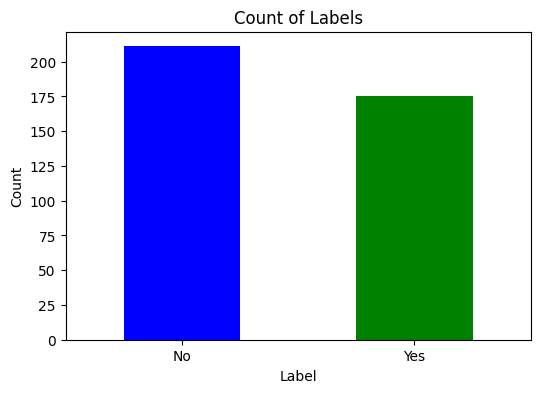

In [26]:
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Count of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## _showing 5  sample Biased and Unbiased Statements_

In [27]:
biased_df = ndf[ndf['Label'] == 'Yes']
unbiased_df = ndf[ndf['Label'] == 'No']

biased_sample = biased_df.sample(n=5)
unbiased_sample = unbiased_df.sample(n=5)

print("Biased statement sample:")
print(biased_sample)

print("\nUnbiased statement sample:")
print(unbiased_sample)


Biased statement sample:
                                               Message Label
350  Women are more suited for roles involving comm...   Yes
302            Women are not strong enough for sports.   Yes
202             Women should not drive heavy vehicles.   Yes
208                  Women should not have short hair.   Yes
183  Women should be in supportive roles rather tha...   Yes

Unbiased statement sample:
                                               Message Label
315  Public relations is a field for anyone with pe...    No
268  Scientific research is a field for anyone with...    No
28           Graphic design skills are useful for all.    No
5                Childcare is a shared responsibility.    No
102  Handling pressure depends on individual resili...    No


In [28]:
ndf.columns

Index(['Message', 'Label'], dtype='object')


## ___Data Preprocessing___

### _i need to encode Label column into 0 and 1 and perform some feature engineering to help the machine learning and statistical model perform well_

In [29]:
def pre_process_text(text):
    global stop_words 
    ## converting to lower case 
    text = text.lower()
    ## removing any special charecters in the strings using regular expression 
    text = re.sub(r'[^\w\s]','',text )

    return text  

ndf['Message'] = ndf['Message'].apply(pre_process_text)

In [30]:
label_mapping = {'No' : 0, 'Yes' : 1}
df = ndf.copy()
df['encoded_label'] = ndf['Label'].replace(label_mapping)
df = df.drop(columns='Label')

/var/folders/by/xmzrnkss61sgzj04dhmn_xw40000gn/T/ipykernel_84621/3472947342.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['encoded_label'] = ndf['Label'].replace(label_mapping)


In [31]:

df.head()

,Message,encoded_label
0,yoga benefits everyone,0
1,everyone can learn to code,0
2,volunteering helps everyone,0
3,women should not drive long distances,1
4,women should not work in the military,1


## ___performing Feature Engineering___

In [32]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels as needed


/Users/HP/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `b

In [33]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize and encode the text data
def tokenize_and_encode(texts, tokenizer, max_length=128):
    return tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=max_length)

# Apply tokenization for training and testing sets
train_inputs = tokenize_and_encode(train_df['Message'].tolist(), tokenizer)
test_inputs = tokenize_and_encode(test_df['Message'].tolist(), tokenizer)

# Convert labels to tensor
train_labels = torch.tensor(train_df['encoded_label'].tolist())
test_labels = torch.tensor(test_df['encoded_label'].tolist())

# Create Datasets and DataLoaders
train_dataset = TensorDataset(train_inputs['input_ids'], train_inputs['attention_mask'], train_labels)
test_dataset = TensorDataset(test_inputs['input_ids'], test_inputs['attention_mask'], test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Training loop
model.train()
for epoch in range(3):  # Number of epochs
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1} complete. Loss: {loss.item()}")

# Save the model (optional)
model.save_pretrained('./bert-finetuned')

# Evaluation
model.eval()
with torch.no_grad():
    correct_predictions = 0
    total_predictions = 0
    for batch in test_dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()
        total_predictions += labels.size(0)
    accuracy = correct_predictions / total_predictions
    print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1 complete. Loss: 0.4319298267364502
Epoch 2 complete. Loss: 0.5683849453926086
Epoch 3 complete. Loss: 0.015337489545345306
Test Accuracy: 0.9744


## _testing on unseen custom data_

In [44]:
def predict_gender_discrimination(texts, tokenizer, model, label_mapping):
    """
    Predict whether each text in the given list contains gender discrimination or not.
    """
    results = []
    
    for text in texts:
        # Preprocess and tokenize the input text
        preprocessed_text = pre_process_text(text)
        encoded_input = tokenize_and_encode([preprocessed_text], tokenizer)
        input_ids = encoded_input['input_ids']
        attention_mask = encoded_input['attention_mask']
        
        # Make prediction
        model.eval()
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            prediction = torch.argmax(logits, dim=1).item()
        
        # Convert prediction to label
        label_mapping_reverse = {v: k for k, v in label_mapping.items()}
        prediction_label = label_mapping_reverse[prediction]
        
        # Store the result as a dictionary
        results.append({
            "input_text": text,
            "prediction": prediction_label,
            "output": f"The text '{text}' has gender discrimination: {prediction_label}"
        })
    
    return results

def save_results_to_json(results, json_file_name):
    with open(json_file_name, 'w') as json_file:
        json.dump(results, json_file, indent=4)
    print(f"Output successfully saved as {json_file_name} file")

def load_json_to_mongodb(json_file_path, db_name, collection_name, mongo_uri="mongodb://localhost:27017"):
    client = MongoClient(mongo_uri)
    db = client[db_name]
    collection = db[collection_name]
    
    # Drop the collection if it exists to overwrite
    if collection_name in db.list_collection_names():
        collection.drop()
        print(f"Collection {collection_name} dropped.")

    # Load JSON data and insert it into the collection
    with open(json_file_path, 'r') as file:
        data = json.load(file)
        if isinstance(data, list):
            collection.insert_many(data)
        else:
            collection.insert_one(data)

    print(f"Data from {json_file_path} has been successfully imported into the {db_name}.{collection_name} collection.")

# Example usage

# List of input texts (5 strings)
texts = [
    "women should not wear short clothes",
    "men are stronger than women",
    "everyone should have equal opportunities",
    "women should stay at home",
    "men and women deserve equal pay"
]

# Predict results for the list of texts
results = predict_gender_discrimination(texts, tokenizer, model, label_mapping)

# Save the results to a JSON file
json_file_name = 'gender_discrimination_results.json'
save_results_to_json(results, json_file_name)

# Load the saved JSON file into MongoDB
json_file_path = r'./gender_discrimination_results.json'  
db_name = 'Eitacies_nn_db'
collection_name = 'GenderDiscriminationCollection'

load_json_to_mongodb(json_file_path, db_name, collection_name)

Output successfully saved as gender_discrimination_results.json file
Data from ./gender_discrimination_results.json has been successfully imported into the Eitacies_nn_db.GenderDiscriminationCollection collection.


In [ ]:
/Users/HP/Desktop/Eitacies_ML_internship_project-main/gender_discrimination_results.json